##### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [ ]:
# path
path=r'C:\Users\aliho\Instacart Basket Analysis'

In [5]:
orders_products_customers = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'orders_products_customers.pkl'))

##### Create a regional segmentation of the data

In [7]:
orders_products_customers.head()


order_id  user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329        1             1                   2                  8   
1   2539329        1             1                   2                  8   
2   2539329        1             1                   2                  8   
3   2539329        1             1                   2                  8   
4   2539329        1             1                   2                  8   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                    11.0         196                  1          0   
1                    11.0       14084                  2          0   
2                    11.0       12427                  3          0   
3                    11.0       26088                  4          0   
4                    11.0       26405                  5          0   

                              product_name  ...  order_frequency  \
0                                     Soda  ...             20.0   
1  Organic Unsweetened Vanilla Almond Milk  ...             20.0   
2                      Original Beef Jerky  ...             20.0   
3               Aged White Cheddar Popcorn  ...             20.0   
4         XL Pick-A-Size Paper Towel Rolls  ...             20.0   

         order_flag  gender    state age date_joined n_dependants fam_status  \
0  Regular customer  Female  Alabama  31   2/17/2019            3    married   
1  Regular customer  Female  Alabama  31   2/17/2019            3    married   
2  Regular customer  Female  Alabama  31   2/17/2019            3    married   
3  Regular customer  Female  Alabama  31   2/17/2019            3    married   
4  Regular customer  Female  Alabama  31   2/17/2019            3    married   

   income          name  
0   40423  Linda Nguyen  
1   40423  Linda Nguyen  
2   40423  Linda Nguyen  
3   40423  Linda Nguyen  
4   40423  Linda Nguyen  

[5 rows x 33 columns]

In [8]:
orders_products_customers['state'].value_counts(dropna=False)

state
Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mi

In [9]:
# Creating Northeast Region
orders_products_customers.loc[orders_products_customers['state'] == 'Maine', 'region'] = 'Northeast'
orders_products_customers.loc[orders_products_customers['state'] == 'New Hampshire', 'region'] = 'Northeast'
orders_products_customers.loc[orders_products_customers['state'] == 'Vermont', 'region'] = 'Northeast'
orders_products_customers.loc[orders_products_customers['state'] == 'Massachusetts', 'region'] = 'Northeast'
orders_products_customers.loc[orders_products_customers['state'] == 'Connecticut', 'region'] = 'Northeast'
orders_products_customers.loc[orders_products_customers['state'] == 'New York', 'region'] = 'Northeast'
orders_products_customers.loc[orders_products_customers['state'] == 'Pennsylvania', 'region'] = 'Northeast'
orders_products_customers.loc[orders_products_customers['state'] == 'New Jersey', 'region'] = 'Northeast'
orders_products_customers.loc[orders_products_customers['state'] == 'Rhode Island', 'region'] = 'Northeast'

In [10]:
# Creating Midwest Region
orders_products_customers.loc[orders_products_customers['state'] == 'Wisconsin', 'region'] = 'Midwest'
orders_products_customers.loc[orders_products_customers['state'] == 'Michigan', 'region'] = 'Midwest'
orders_products_customers.loc[orders_products_customers['state'] == 'Illinois', 'region'] = 'Midwest'
orders_products_customers.loc[orders_products_customers['state'] == 'Indiana', 'region'] = 'Midwest'
orders_products_customers.loc[orders_products_customers['state'] == 'Ohio', 'region'] = 'Midwest'
orders_products_customers.loc[orders_products_customers['state'] == 'North Dakota', 'region'] = 'Midwest'
orders_products_customers.loc[orders_products_customers['state'] == 'South Dakota', 'region'] = 'Midwest'
orders_products_customers.loc[orders_products_customers['state'] == 'Nebraska', 'region'] = 'Midwest'
orders_products_customers.loc[orders_products_customers['state'] == 'Kansas', 'region'] = 'Midwest'
orders_products_customers.loc[orders_products_customers['state'] == 'Minnesota', 'region'] = 'Midwest'
orders_products_customers.loc[orders_products_customers['state'] == 'Iowa', 'region'] = 'Midwest'
orders_products_customers.loc[orders_products_customers['state'] == 'Missouri', 'region'] = 'Midwest'

In [11]:
# Creating South Region
orders_products_customers.loc[orders_products_customers['state'] == 'Delaware', 'region'] = 'South'
orders_products_customers.loc[orders_products_customers['state'] == 'Maryland', 'region'] = 'South'
orders_products_customers.loc[orders_products_customers['state'] == 'District of Columbia', 'region'] = 'South'
orders_products_customers.loc[orders_products_customers['state'] == 'Virginia', 'region'] = 'South'
orders_products_customers.loc[orders_products_customers['state'] == 'West Virginia', 'region'] = 'South'
orders_products_customers.loc[orders_products_customers['state'] == 'North Carolina', 'region'] = 'South'
orders_products_customers.loc[orders_products_customers['state'] == 'South Carolina', 'region'] = 'South'
orders_products_customers.loc[orders_products_customers['state'] == 'Georgia', 'region'] = 'South'
orders_products_customers.loc[orders_products_customers['state'] == 'Florida', 'region'] = 'South'
orders_products_customers.loc[orders_products_customers['state'] == 'Kentucky', 'region'] = 'South'
orders_products_customers.loc[orders_products_customers['state'] == 'Tennessee', 'region'] = 'South'
orders_products_customers.loc[orders_products_customers['state'] == 'Mississippi', 'region'] = 'South'
orders_products_customers.loc[orders_products_customers['state'] == 'Alabama', 'region'] = 'South'
orders_products_customers.loc[orders_products_customers['state'] == 'Oklahoma', 'region'] = 'South'
orders_products_customers.loc[orders_products_customers['state'] == 'Texas', 'region'] = 'South'
orders_products_customers.loc[orders_products_customers['state'] == 'Arkansas', 'region'] = 'South'
orders_products_customers.loc[orders_products_customers['state'] == 'Louisiana', 'region'] = 'South'

In [12]:
# Creating West Region
orders_products_customers.loc[orders_products_customers['state'] == 'Idaho', 'region'] = 'West'
orders_products_customers.loc[orders_products_customers['state'] == 'Montana', 'region'] = 'West'
orders_products_customers.loc[orders_products_customers['state'] == 'Wyoming', 'region'] = 'West'
orders_products_customers.loc[orders_products_customers['state'] == 'Nevada', 'region'] = 'West'
orders_products_customers.loc[orders_products_customers['state'] == 'Utah', 'region'] = 'West'
orders_products_customers.loc[orders_products_customers['state'] == 'Colorado', 'region'] = 'West'
orders_products_customers.loc[orders_products_customers['state'] == 'Arizona', 'region'] = 'West'
orders_products_customers.loc[orders_products_customers['state'] == 'New Mexico', 'region'] = 'West'
orders_products_customers.loc[orders_products_customers['state'] == 'Alaska', 'region'] = 'West'
orders_products_customers.loc[orders_products_customers['state'] == 'Washington', 'region'] = 'West'
orders_products_customers.loc[orders_products_customers['state'] == 'Oregon', 'region'] = 'West'
orders_products_customers.loc[orders_products_customers['state'] == 'California', 'region'] = 'West'
orders_products_customers.loc[orders_products_customers['state'] == 'Hawaii', 'region'] = 'West'

##### Comparing customer behavior in different geographic areas.

In [14]:
orders_products_customers['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [15]:
# Creating a crosstab with 'region' and 'spending_flag' variable
cross_tab = pd.crosstab(orders_products_customers['region'],orders_products_customers['spending_flag'], dropna = False)

In [16]:
cross_tab

spending_flag  High spender  Low spender
region                                  
Midwest               29294      7568031
Northeast             18642      5704094
South                 40739     10751146
West                  31286      8261627

##### Create an exclusion flag for low-activity customers (customers with less than 5 orders) 

In [18]:
# Creating order_flag variable to flag customers with less than 5 orders.
orders_products_customers.loc[orders_products_customers['max_order'] < 5, 'order_flag'] = 'low-activity customer'
orders_products_customers.loc[orders_products_customers['max_order'] >= 5, 'order_flag'] = 'high-activity customer'

In [19]:
orders_products_customers['order_flag'].value_counts(dropna = False)

order_flag
high-activity customer    30964564
low-activity customer      1440295
Name: count, dtype: int64

In [20]:
orders_products_customers.shape

(32404859, 34)

In [21]:
df_ords_prods_cust = orders_products_customers[orders_products_customers['order_flag'] != 'low-activity customer']

In [22]:
df_ords_prods_cust.shape

(30964564, 34)

##### Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. 

In [24]:
# Creating an age_flag variable
df_ords_prods_cust.loc[df_ords_prods_cust['age'] < 25, 'age_flag'] = 'young adults'
df_ords_prods_cust.loc[(df_ords_prods_cust['age'] >= 25) & (df_ords_prods_cust['age'] < 55), 'age_flag'] = 'adults'
df_ords_prods_cust.loc[df_ords_prods_cust['age'] >= 55, 'age_flag'] = 'senior adults'

C:\Users\aliho\AppData\Local\Temp\ipykernel_12504\751456441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ords_prods_cust.loc[df_ords_prods_cust['age'] < 25, 'age_flag'] = 'young adults'


In [25]:
df_ords_prods_cust['age_flag'].value_counts(dropna=False)

age_flag
adults           14551339
senior adults    12998031
young adults      3415194
Name: count, dtype: int64

In [26]:
# Creating an income_flag variable
df_ords_prods_cust.loc[df_ords_prods_cust['income'] <= 50000, 'income_flag'] = 'low income'
df_ords_prods_cust.loc[(df_ords_prods_cust['income'] > 50000) & (df_ords_prods_cust['income'] <= 120000),'income_flag'] = 'middle income'
df_ords_prods_cust.loc[df_ords_prods_cust['income'] > 120000, 'income_flag'] = 'high income'

C:\Users\aliho\AppData\Local\Temp\ipykernel_12504\1580359297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ords_prods_cust.loc[df_ords_prods_cust['income'] <= 50000, 'income_flag'] = 'low income'


In [27]:
df_ords_prods_cust['income_flag'].value_counts(dropna = False)

income_flag
middle income    18422497
high income       9179513
low income        3362554
Name: count, dtype: int64

In [28]:
# Creating 'dependant_flag' variable
df_ords_prods_cust.loc[df_ords_prods_cust['n_dependants'] <= 0, 'dependant_flag'] = 'No dependent'
df_ords_prods_cust.loc[df_ords_prods_cust['n_dependants'] > 0, 'dependant_flag'] = 'With dependant'

C:\Users\aliho\AppData\Local\Temp\ipykernel_12504\3082354133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ords_prods_cust.loc[df_ords_prods_cust['n_dependants'] <= 0, 'dependant_flag'] = 'No dependent'


In [30]:
# Importing department dataset
df_department= pd.read_csv(os.path.join(path, '02. Data','Prepared Data', 'department_wrangled.csv'), index_col = False)

In [31]:
df_department.head()

Unnamed: 0 department
0           1     frozen
1           2      other
2           3     bakery
3           4    produce
4           5    alcohol

In [32]:
# Rename 'Unnamed: 0' to 'department_id'
df_department.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)

In [33]:
df_department.head()

department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol

In [47]:
# Merging 'ords_prods_cust' with 'department' dataset on 'department_id' as key
df_final = df_ords_prods_cust.merge(df_department, on = 'department_id', indicator = True)

In [49]:
df_final.shape

(30964564, 39)

In [53]:
# Exporting df_final
df_final.to_pickle(os.path.join(path, '02. Data','Prepared Data', 'df_final.pkl'))

In [ ]:
# Importing df_final
df_final = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'df_final.pkl'))

In [10]:
# Checking output
df_final.shape
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30964564 entries, 0 to 30964563
Data columns (total 39 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int32   
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  match                   category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  average_prices          float64 
 21  averag

In [16]:
# Creating a crosstab with 'department' and 'age_flag' variable
dep_age_crosstab = pd.crosstab(df_final['age_flag'],df_final['department'], dropna = False)

In [17]:
dep_age_crosstab

department     alcohol  babies  bakery  beverages  breakfast   bulk  \
age_flag                                                              
adults           67795  195832  527272    1204577     315766  15693   
senior adults    59355  168735  469974    1088068     279636  13991   
young adults     17477   45825  123582     279256      75448   3767   

department     canned goods  dairy eggs    deli  dry goods pasta  ...  \
age_flag                                                          ...   
adults               476773     2438382  471261           385649  ...   
senior adults        423707     2165648  422601           344752  ...   
young adults         111594      573152  109972            91735  ...   

department     household  international  meat seafood  missing  other  pantry  \
age_flag                                                                        
adults            327964         121288        313849    30754  16179  836155   
senior adults     294874         106093        285695    26575  14309  749849   
young adults       77019          28610         75237     7439   3923  196701   

department     personal care   pets  produce   snacks  
age_flag                                               
adults                200127  42511  4265471  1304467  
senior adults         177645  39245  3814474  1158736  
young adults           46534  11304   999328   303203  

[3 rows x 21 columns]

##### Visualization

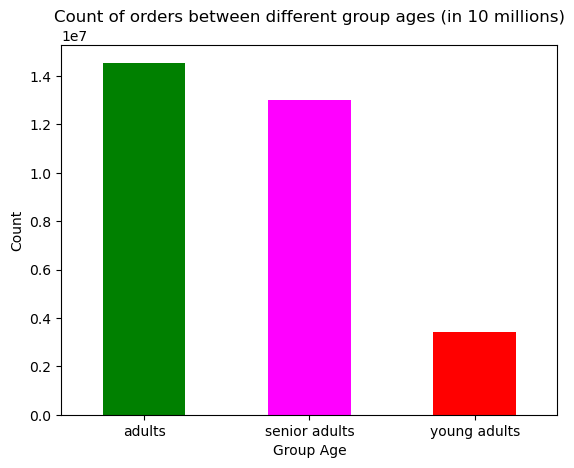

In [19]:
# Creating 'age flag' Visualisation 
df_final['age_flag'].value_counts().plot.bar(color = ['green', 'magenta', 'red'])
# Adding label
plt.xlabel('Group Age', rotation=0)
plt.ylabel('Count')
plt.title('Count of orders between different group ages (in 10 millions)')
plt.xticks(rotation=0)
plt.show()

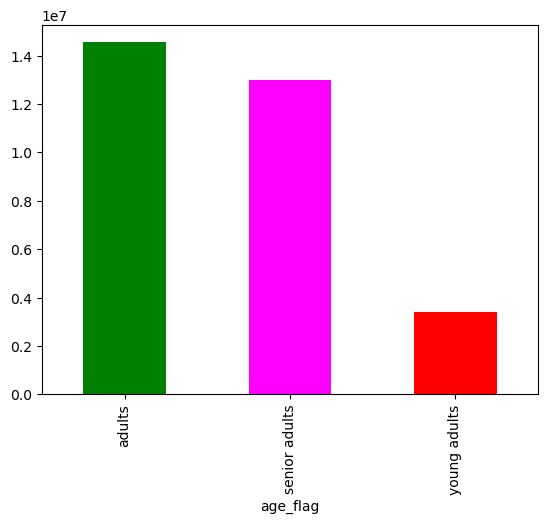

In [20]:
# Saving the bar chart on jupyter
bar_age = df_final['age_flag'].value_counts().plot.bar(color = ['green', 'magenta', 'red'])

In [21]:
# Saving bar chart on my Visualization file
bar_age.figure.savefig(os.path.join(path, '04. Analysis','Visualization', 'bar_age_flag.png'))

In [12]:
dependant_flag_count = df_final['dependant_flag'].value_counts(dropna = False)
dependant_flag_count

dependant_flag
With dependant    23224883
No dependent       7739681
Name: count, dtype: int64

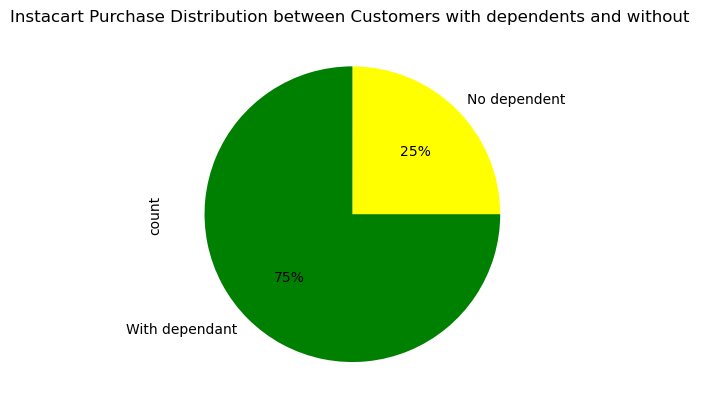

In [14]:
# Creating 'dependant_flag' pie chart visualization 
pie_dependant = dependant_flag_count.groupby(['dependant_flag']).sum().plot(kind='pie', y='dependant_flag_count', autopct='%1.0f%%',
                                colors = ['yellow','green'],
                                title='Instacart Purchase Distribution between Customers with dependents and without ')

In [16]:
# Saving the pie chart
pie_dependant.figure.savefig(os.path.join(path, '04. Analysis','Visualization', 'pie_dependant_flag.png'))

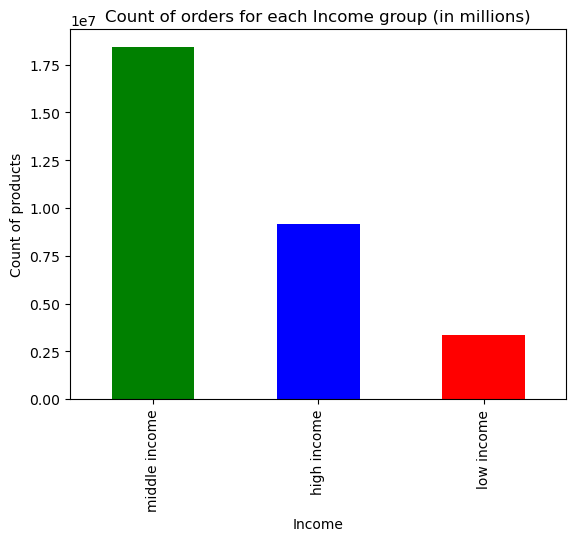

In [18]:
# Creating income_flag bar chart
bar_income_flag = df_final['income_flag'].value_counts().plot.bar(color = ['green','blue','red'])
# Adding label
plt.xlabel('Income')
plt.ylabel('Count of products')
plt.title('Count of orders for each Income group (in millions)')
plt.show()

In [20]:
# Saving the Income bar chart
bar_income_flag.figure.savefig(os.path.join(path, '04. Analysis','Visualization', 'bar_income_flag.png'))

In [ ]:
bar_department = df_final['department'].value_counts().plot.bar()
# Adding label
plt.xlabel('Departments', rotation = 45)
plt.ylabel('Count of products')
plt.title('Count of orders for each department (in millions)')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# Saving the department bar chart
bar_department.figure.savefig(os.path.join(path, '04. Analysis','Visualization', 'bar_department_flag.png'))

##### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [ ]:
df_final.groupby('age_flag').agg({'days_since_prior_order': ['mean', 'min', 'max'],'max_order': ['mean', 'min', 'max']})

In [28]:
df_final.groupby('dependant_flag').agg({'days_since_prior_order': ['mean', 'min', 'max'],'order_hour_of_day': ['mean', 'min', 'max']})

days_since_prior_order            order_hour_of_day        
                                 mean  min   max              mean min max
dependant_flag                                                            
No dependent                10.803101  0.0  30.0         13.421183   0  23
With dependant              10.826269  0.0  30.0         13.407581   0  23

In [29]:
df_final.groupby('department').agg({'days_since_prior_order': ['mean', 'min', 'max'],'order_hour_of_day': ['mean', 'min', 'max']})

days_since_prior_order            order_hour_of_day        
                                  mean  min   max              mean min max
department                                                                 
alcohol                      10.073693  0.0  30.0         13.577672   0  23
babies                        9.836352  0.0  30.0         13.390285   0  23
bakery                       10.818695  0.0  30.0         13.384874   0  23
beverages                    10.780560  0.0  30.0         13.299538   0  23
breakfast                    11.001240  0.0  30.0         13.312059   0  23
bulk                          9.928851  0.0  30.0         13.444082   0  23
canned goods                 11.298830  0.0  30.0         13.437216   0  23
dairy eggs                   10.724245  0.0  30.0         13.352853   0  23
deli                         11.048508  0.0  30.0         13.466102   0  23
dry goods pasta              11.414575  0.0  30.0         13.533114   0  23
frozen                       11.389441  0.0  30.0         13.667322   0  23
household                    11.611376  0.0  30.0         13.335437   0  23
international                10.965874  0.0  30.0         13.500209   0  23
meat seafood                 11.116774  0.0  30.0         13.455197   0  23
missing                       9.893620  0.0  30.0         13.443166   0  23
other                        10.644707  0.0  30.0         13.488652   0  23
pantry                       10.845297  0.0  30.0         13.444714   0  23
personal care                11.241404  0.0  30.0         13.475188   0  23
pets                         11.560015  0.0  30.0         13.571524   0  23
produce                      10.596192  0.0  30.0         13.412386   0  23
snacks                       10.688453  0.0  30.0         13.346152   0  23

In [30]:
df_final.groupby('income_flag').agg({'days_since_prior_order': ['mean', 'min', 'max'],'max_order': ['mean', 'min', 'max']})

days_since_prior_order             max_order        
                                mean  min   max       mean min max
income_flag                                                       
high income                10.772731  0.0  30.0  34.623992   5  99
low income                 11.165629  0.0  30.0  32.382129   5  99
middle income              10.781270  0.0  30.0  34.699876   5  99

##### Compare customer profiles with regions and departments.

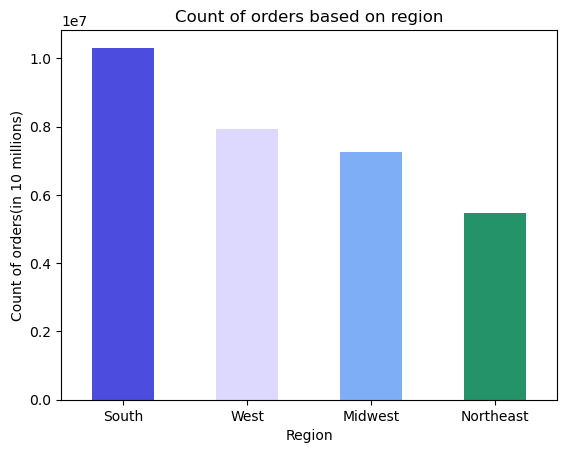

In [76]:
# Creating a region bar chart
region = df_final['region'].value_counts().plot.bar(color = np.random.rand(len('region'), 4))
# Adding labels
plt.xlabel('Region', rotation = 0)
plt.ylabel('Count of orders(in 10 millions)')
plt.title('Count of orders based on region')
plt.xticks(rotation = 0)
plt.show()

In [78]:
# Saving the region bar chart
region.figure.savefig(os.path.join(path, '04. Analysis','Visualization', 'bar_region.png'))

In [82]:
# Creating a crosstab with 'region' and 'age_flag'
cross_tab_age = pd.crosstab(df_final['region'],df_final['age_flag'], dropna = False)
cross_tab_age

age_flag    adults  senior adults  young adults
region                                         
Midwest    3437516        3032371        791626
Northeast  2551783        2310112        602790
South      4830450        4315553       1165136
West       3731590        3339995        855642

<Axes: xlabel='region'>

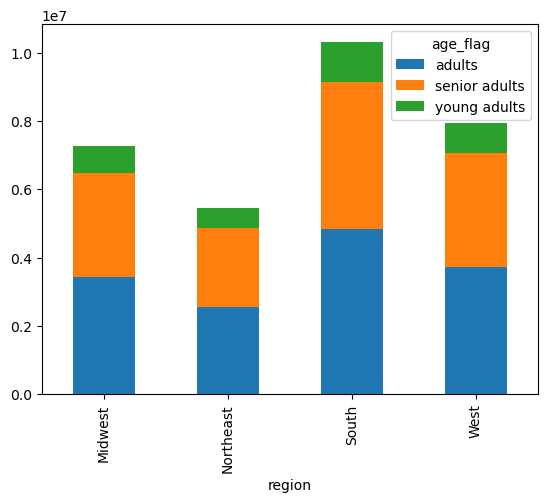

In [84]:
cross_tab_age.plot(kind = 'bar', stacked = True)

In [35]:
cross_tab_income = pd.crosstab(df_final['region'],df_final['income_flag'], dropna = False)
cross_tab_income

income_flag  high income  low income  middle income
region                                             
Midwest          2188923      783764        4288826
Northeast        1628878      587137        3248670
South            3023406     1142572        6145161
West             2338306      849081        4739840

<Axes: xlabel='region'>

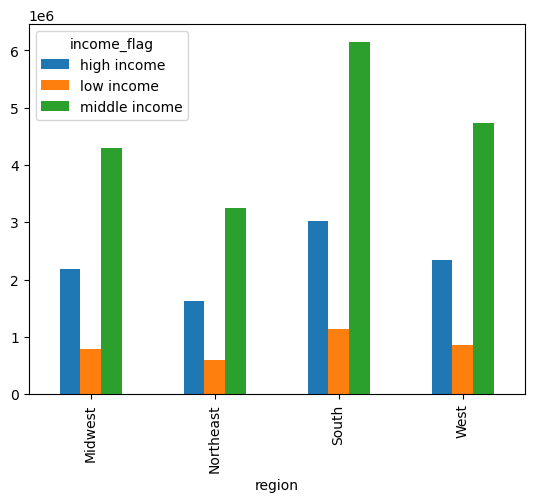

In [36]:
cross_tab_income.plot(kind = 'bar', stacked = False)

In [ ]:
# Creating a crosstab of family status and age 
df_final.groupby('loyalty_flag').agg({'fam_status': ['mean', 'min', 'max'],'age': ['mean', 'min', 'max']})

In [ ]:
df_final.groupby(['fam_status']).sum().plot(kind='pie', y='fam_status', autopct='%1.0f%%',
title='Instacart Purchase Distribution between Customers with dependents and without ')

<Axes: xlabel='fam_status', ylabel='age'>

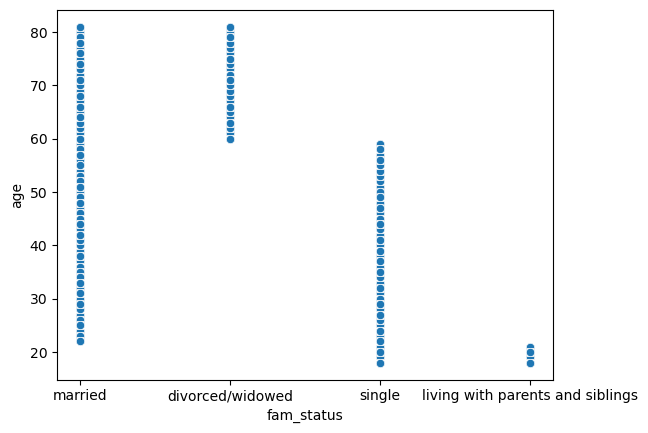

In [88]:
sns.scatterplot(x = 'fam_status', y = 'age', data = df_final)

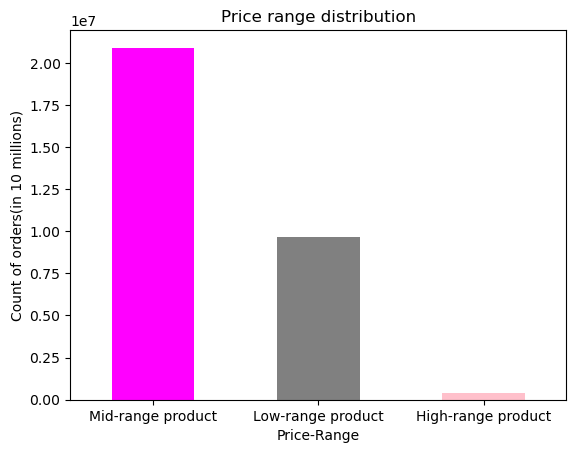

In [52]:
# Creating a bar chart that shows price range distribution
price_range = df_final['price_range_loc'].value_counts().plot.bar(color = ['magenta', 'gray', 'pink'])
# Adding labels
plt.xlabel('Price-Range', rotation = 0)
plt.ylabel('Count of orders(in 10 millions)')
plt.title('Price range distribution')
plt.xticks(rotation = 0)
plt.show()

In [56]:
# Saving price range distribution
price_range.figure.savefig(os.path.join(path, '04. Analysis','Visualization', 'bar_price_range.png'))

In [24]:
cross_tab_loyalty = pd.crosstab(df_final['loyalty_flag'],df_final['price_range_loc'], dropna = False)
cross_tab_loyalty

price_range_loc   High-range product  Low-range product  Mid-range product
loyalty_flag                                                              
Loyal customer                118606            3214690            6950797
New customer                   65028            1501288            3237379
Regular customer              209442            4958862           10708472

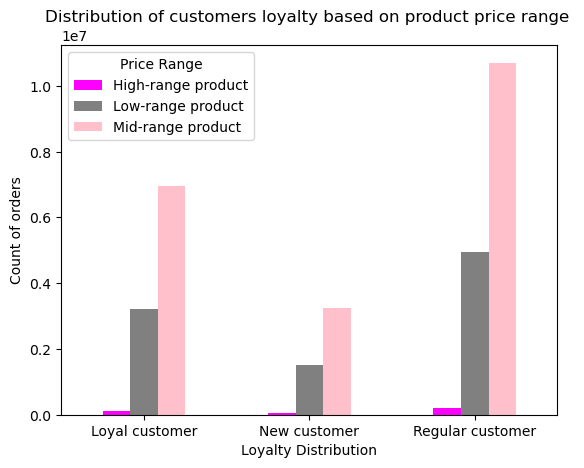

In [44]:
price_loyalty_dist = cross_tab_loyalty.plot(kind = 'bar', color = ('magenta', 'gray', 'pink'), stacked = False)
# Adding labels
plt.xlabel('Loyalty Distribution', rotation=0)
plt.ylabel('Count of orders')
plt.title('Distribution of customers loyalty based on product price range ')
plt.legend(title = 'Price Range')
plt.xticks(rotation=0)
plt.show()

In [46]:
# Saving the price_loyalty_dist visualisation
price_loyalty_dist.figure.savefig(os.path.join(path, '04. Analysis','Visualization', 'bar_price_loyalty.png'))